In [1]:
import matplotlib.pyplot as plt
import  cv2
# Technically not necessary in newest version of jupyter \
%matplotlib inline

In [23]:
cat4= cv2.imread('C:/AI 2024/2. Computer Vision/CATS_DOGS/CATS_DOGS/train/CAT/4.jpg')
cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [24]:
cat4.shape

(375, 500, 3)

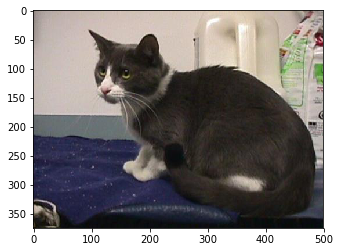

In [25]:
plt.imshow(cat4)

In [26]:
dog2= cv2.imread('C:/AI 2024/2. Computer Vision/CATS_DOGS/CATS_DOGS/train/DOG/2.jpg')
dog2=cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [27]:
dog2.shape

(199, 188, 3)

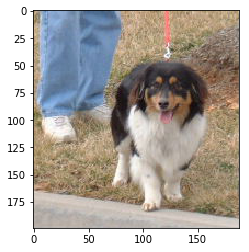

In [28]:
plt.imshow(dog2)

Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes 
more robust to different images that our data set doesn't have. We can use the ImageDataGenerator to do this 
automatically for us.

In [29]:
from keras.preprocessing.image import ImageDataGenerator

In [30]:
# Image augmentation using ImageDataGenerator
image_gen = ImageDataGenerator(
    rotation_range=30,         # Rotate the image by 30 degrees
    width_shift_range=0.1,     # Shift the image horizontally by 10% of the width
    height_shift_range=0.1,    # Shift the image vertically by 10% of the height
    rescale=1/255,             # Rescale the image by normalizing pixel values to [0, 1]
    shear_range=0.2,           # Shear the image by 20%
    zoom_range=0.2,            # Zoom in on the image by up to 20%
    horizontal_flip=True,      # Allow horizontal flipping of the image
    fill_mode='nearest'        # Fill in missing pixels with nearest pixel value
)

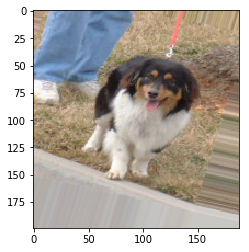

In [31]:
# Display a randomly transformed version of the 'dog2' image
# Apply the random transformations defined in the ImageDataGenerator to 'dog2'
# Display the transformed image using Matplotlib
plt.imshow(image_gen.random_transform(dog2))

In [32]:
image_gen.flow_from_directory('C:/AI 2024/2. Computer Vision/CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated

In [33]:
# width, height, channels
image_shape = (150,150,3)

Creating the Model

In [34]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [35]:
# Initialize the model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, 3x3 kernel size, and 'relu' activation function
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))

# Add a MaxPooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a 2D convolutional layer with 64 filters, 3x3 kernel size, and 'relu' activation function
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add a MaxPooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters, 3x3 kernel size, and 'relu' activation function
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add another MaxPooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a Flatten layer to convert 4D tensor to 1D
model.add(Flatten())

In [36]:
# Add a fully connected (Dense) layer with 128 units
model.add(Dense(128))

# Add a ReLU activation function
model.add(Activation('relu'))

# Dropout helps reduce overfitting by randomly turning off neurons during training
# Here we randomly turn off 50% of neurons
model.add(Dropout(0.5))

# Output layer with 1 unit for binary classification (e.g., cat vs. dog)
model.add(Dense(1))

# Add a sigmoid activation function for binary classification
model.add(Activation('sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

Training the model

In [38]:
batch_size = 16

# Assuming image_gen is an instance of ImageDataGenerator
train_image_gen = image_gen.flow_from_directory(
    'C:/AI 2024/2. Computer Vision/CATS_DOGS/CATS_DOGS/train',  # Directory containing the images
    target_size=image_shape[:2],       # Resize images to match the target size
    batch_size=batch_size,             # Number of images to return in each batch
    class_mode='binary'                # Mode for labels: 'binary' for binary classification
)

# image_gen is likely an instance of the ImageDataGenerator class from Keras.
# This class provides a way to generate batches of tensor image data with real-time data augmentation.
# The flow_from_directory method is used to load images from a directory in a structured way.
# target_size=image_shape[:2]:
# This parameter specifies the target size to which all images will be resized.
# The image_shape[:2] suggests that image_shape is a tuple, and [:2] means the width and height.
# This ensures that all images have a uniform size.

Found 18743 images belonging to 2 classes.


In [39]:
test_image_gen = image_gen.flow_from_directory(
    'C:/AI 2024/2. Computer Vision/CATS_DOGS/CATS_DOGS/test',  # Directory containing the images
    target_size=image_shape[:2],       # Resize images to match the target size
    batch_size=batch_size,             # Number of images to return in each batch
    class_mode='binary'                # Mode for labels: 'binary' for binary classification
)


Found 6251 images belonging to 2 classes.


In [40]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [ ]:
# Train the model using the fit_generator method
results = model.fit_generator(
    train_image_gen,            # Training data generator
    epochs=10,                  # Number of epochs to train the model
    steps_per_epoch=15,         # Number of steps per epoch
    validation_data=test_image_gen,  # Validation data generator
    validation_steps=12         # Number of steps for validation
)

Epoch 1/10
15/15 [==============================] - 341s 23s/step - loss: 0.7463 - acc: 0.4750 - val_loss: 0.7038 - val_acc: 0.4999
Epoch 2/10
15/15 [==============================] - 254s 17s/step - loss: 0.6969 - acc: 0.4750 - val_loss: 0.6926 - val_acc: 0.5025
Epoch 3/10
15/15 [==============================] - 271s 18s/step - loss: 0.6926 - acc: 0.5208 - val_loss: 0.6916 - val_acc: 0.5041
Epoch 4/10
15/15 [==============================] - 278s 19s/step - loss: 0.6975 - acc: 0.4667 - val_loss: 0.6913 - val_acc: 0.5154
Epoch 5/10
15/15 [==============================] - 264s 18s/step - loss: 0.6934 - acc: 0.4792 - val_loss: 0.6943 - val_acc: 0.4991
Epoch 6/10
14/15 [===========================>..] - ETA: 1s - loss: 0.6898 - acc: 0.5000

In [ ]:
result.history['acc']

In [ ]:
plt.plot(results.history['acc'])